<a href="https://www.kaggle.com/code/septianbagussantoso/tugas-machine-learning-ds-unsw-nb15-kelompok-8?scriptVersionId=242646599" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tugas-machine-learning-ds-unsw-nb15/UNSW_NB15_testing-set.csv
/kaggle/input/tugas-machine-learning-ds-unsw-nb15/UNSW-NB15_1.csv
/kaggle/input/tugas-machine-learning-ds-unsw-nb15/UNSW_NB15_training-set.csv
/kaggle/input/tugas-machine-learning-ds-unsw-nb15/UNSW-NB15_LIST_EVENTS.csv
/kaggle/input/tugas-machine-learning-ds-unsw-nb15/UNSW-NB15_4.csv
/kaggle/input/tugas-machine-learning-ds-unsw-nb15/UNSW-NB15_3.csv
/kaggle/input/tugas-machine-learning-ds-unsw-nb15/UNSW-NB15_2.csv
/kaggle/input/tugas-machine-learning-ds-unsw-nb15/NUSW-NB15_features.csv


In [2]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2025-05-30 01:51:30.629989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748569890.891787      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748569890.965721      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
#LOAD DATA
train_path = "/kaggle/input/tugas-machine-learning-ds-unsw-nb15/UNSW_NB15_training-set.csv"
test_path = "/kaggle/input/tugas-machine-learning-ds-unsw-nb15/UNSW_NB15_testing-set.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [4]:
#SPLIT FITUR & LABEL
X_train = df_train.drop(columns=["label", "attack_cat"])
y_train = df_train["label"]
X_test = df_test.drop(columns=["label", "attack_cat"])
y_test = df_test["label"]

In [5]:
#ENCODING FITUR KATEGORIK (AMAN DARI UNSEEN)
categorical_columns = X_train.select_dtypes(include=["object"]).columns
encoders = {}

for col in categorical_columns:
    encoder = LabelEncoder()
    X_train[col] = encoder.fit_transform(X_train[col].astype(str))
    label_map = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    X_test[col] = X_test[col].astype(str).map(label_map)
    X_test[col] = X_test[col].fillna(len(label_map)).astype(int)
    encoders[col] = encoder

In [6]:
#NORMALISASI
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#INISIALISASI MODEL SKLEARN
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(probability=True),
    "Naïve Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extreme Gradient Boosting": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

In [8]:
#EVALUASI MODEL SKLEARN
results = []
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average='weighted') * 100
    recall = recall_score(y_test, y_pred, average='weighted') * 100
    f1 = f1_score(y_test, y_pred, average='weighted') * 100

    results.append({
        "Model": name,
        "Accuracy (%)": accuracy,
        "Precision (%)": precision,
        "Recall (%)": recall,
        "F1-Score (%)": f1
    })

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Support Vector Machine...
Training Naïve Bayes...
Training K-Nearest Neighbors...
Training AdaBoost...
Training Extreme Gradient Boosting...
Training Linear Discriminant Analysis...
Training Stochastic Gradient Descent...
Training Neural Network (MLP)...


In [9]:
#DEFINISI MODEL CNN
def create_cnn_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [10]:
#TRAIN CNN FULL FITUR
cnn_model = create_cnn_model(X_train_scaled.shape[1])
history = cnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
                        validation_data=(X_test_scaled, y_test), verbose=0)

y_pred_cnn = (cnn_model.predict(X_test_scaled) > 0.5).astype(int)

accuracy_cnn = accuracy_score(y_test, y_pred_cnn) * 100
precision_cnn = precision_score(y_test, y_pred_cnn, average='weighted') * 100
recall_cnn = recall_score(y_test, y_pred_cnn, average='weighted') * 100
f1_cnn = f1_score(y_test, y_pred_cnn, average='weighted') * 100

results.append({
    "Model": "CNN (All features)",
    "Accuracy (%)": accuracy_cnn,
    "Precision (%)": precision_cnn,
    "Recall (%)": recall_cnn,
    "F1-Score (%)": f1_cnn
})

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-30 02:06:11.125950: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


5480/5480 ━━━━━━━━━━━━━━━━━━━━ 5s 949us/step


In [11]:
#BUAT DATAFRAME HASIL
results_df = pd.DataFrame(results)

/tmp/ipykernel_13/3634674507.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


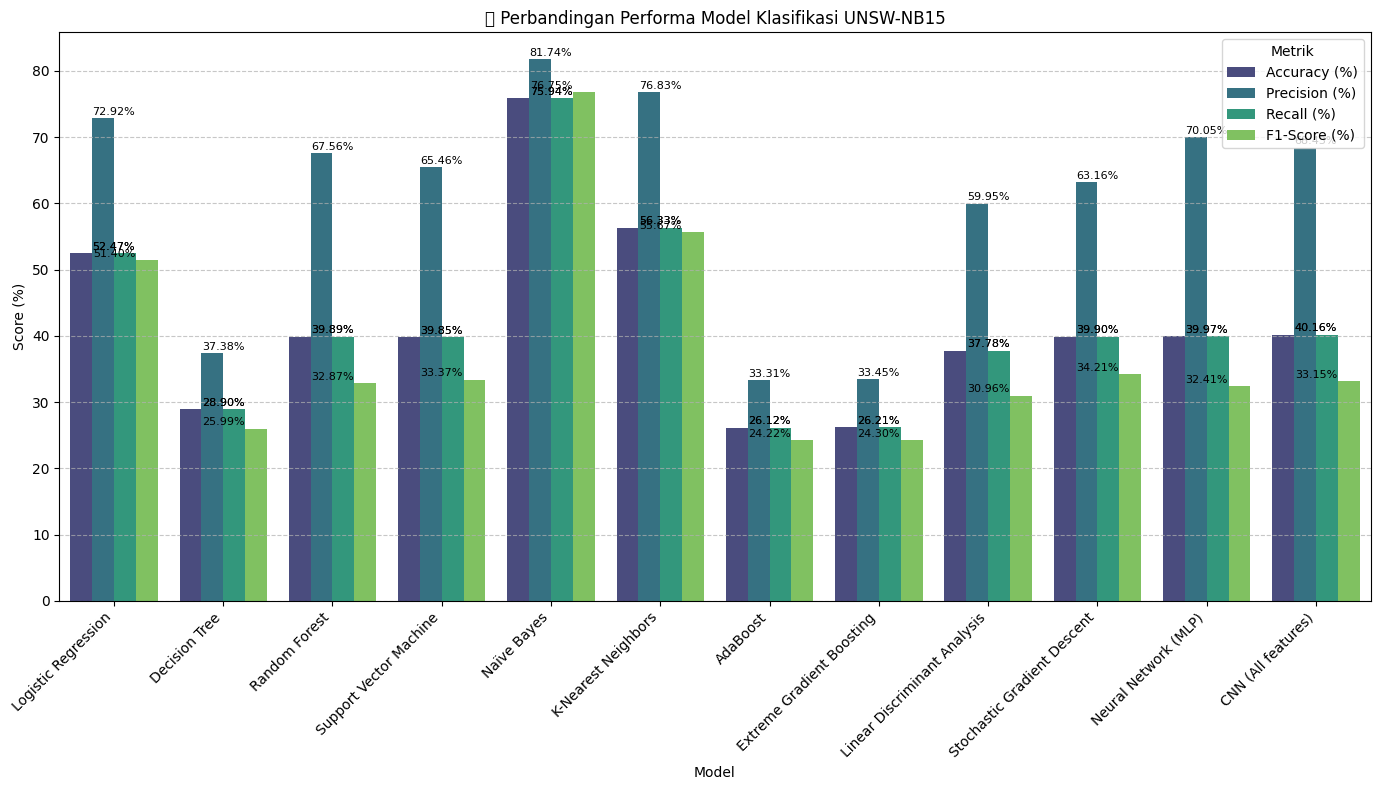

In [12]:
#VISUALISASI BAR CHART PERFORMA
plt.figure(figsize=(14, 8))
results_melted = results_df.melt(id_vars=["Model"], var_name="Metric", value_name="Value")
sns.barplot(data=results_melted, x="Model", y="Value", hue="Metric", palette="viridis")
for index, row in results_melted.iterrows():
    plt.text(index % len(results_df), row["Value"] + 0.5, f"{row['Value']:.2f}%", ha='center', fontsize=8)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Score (%)")
plt.title("📊 Perbandingan Performa Model Klasifikasi UNSW-NB15")
plt.legend(title="Metrik")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
#EKSPERIMEN CNN DENGAN BEBERAPA FITUR
max_features = X_train_scaled.shape[1]
feature_counts = [k for k in [42, 31, 24, 17] if k <= max_features]
accuracy_scores, loss_scores = [], []

for k in feature_counts:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)

    cnn_model_k = create_cnn_model(X_train_selected.shape[1])
    history_k = cnn_model_k.fit(X_train_selected, y_train, epochs=50, batch_size=32,
                                validation_data=(X_test_selected, y_test), verbose=0)

    accuracy_scores.append(history_k.history["val_accuracy"])
    loss_scores.append(history_k.history["val_loss"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

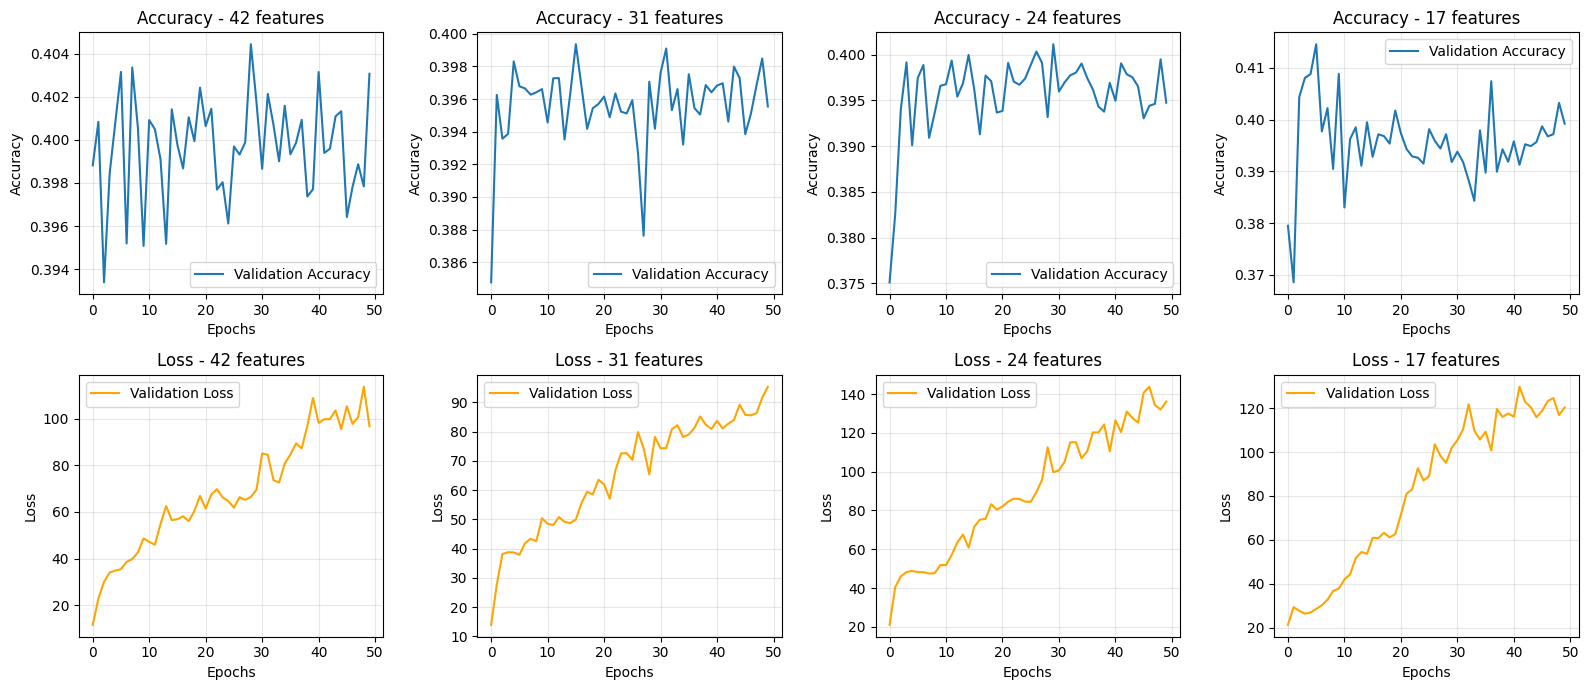

In [14]:
#VISUALISASI ACCURACY & LOSS CNN BERBAGAI FITUR
cols = len(feature_counts)
fig, axes = plt.subplots(2, cols, figsize=(4 * cols, 7))
feature_labels = [f"{k} features" for k in feature_counts]

for i in range(cols):
    axes[0, i].plot(accuracy_scores[i], label="Validation Accuracy")
    axes[0, i].set_title(f"Accuracy - {feature_labels[i]}")
    axes[0, i].set_xlabel("Epochs")
    axes[0, i].set_ylabel("Accuracy")
    axes[0, i].legend()
    axes[0, i].grid(alpha=0.3)

    axes[1, i].plot(loss_scores[i], label="Validation Loss", color="orange")
    axes[1, i].set_title(f"Loss - {feature_labels[i]}")
    axes[1, i].set_xlabel("Epochs")
    axes[1, i].set_ylabel("Loss")
    axes[1, i].legend()
    axes[1, i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Support Vector Machine...
Training Naïve Bayes...
Training K-Nearest Neighbors...
Training AdaBoost...
Training Extreme Gradient Boosting...
Training Linear Discriminant Analysis...
Training Stochastic Gradient Descent...
Training Neural Network (MLP)...
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1030/1030 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9014 - loss: 0.4471 - val_accuracy: 0.9642 - val_loss: 0.1792
Epoch 2/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9653 - loss: 0.1621 - val_accuracy: 0.9747 - val_loss: 0.1295
Epoch 3/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9791 - loss: 0.1155 - val_accuracy: 0.9927 - val_loss: 0.0804
Epoch 4/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9848 - loss: 0.0967 - val_accuracy: 0.9917 - val_loss: 0.0736
Epoch 5/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9849 - loss: 0.0851 - val_accuracy: 0.9899 - val_loss: 0.0710
Epoch 6/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9869 - loss: 0.0787 - val_accuracy: 0.9914 - val_loss: 0.0668
Epoch 7/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9870 - loss: 0.0774 - val_accuracy: 0.9939 - val_loss: 0.0599
Epoch 8/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9870 - loss: 0.0753 - val_

/tmp/ipykernel_13/3028194857.py:135: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


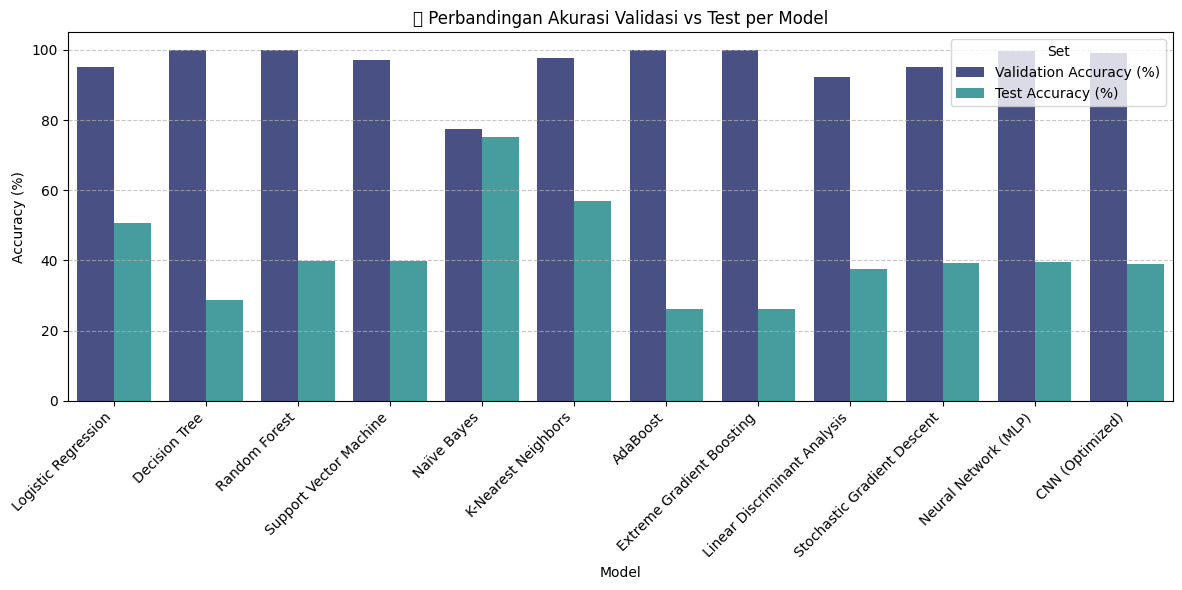

/tmp/ipykernel_13/3028194857.py:147: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


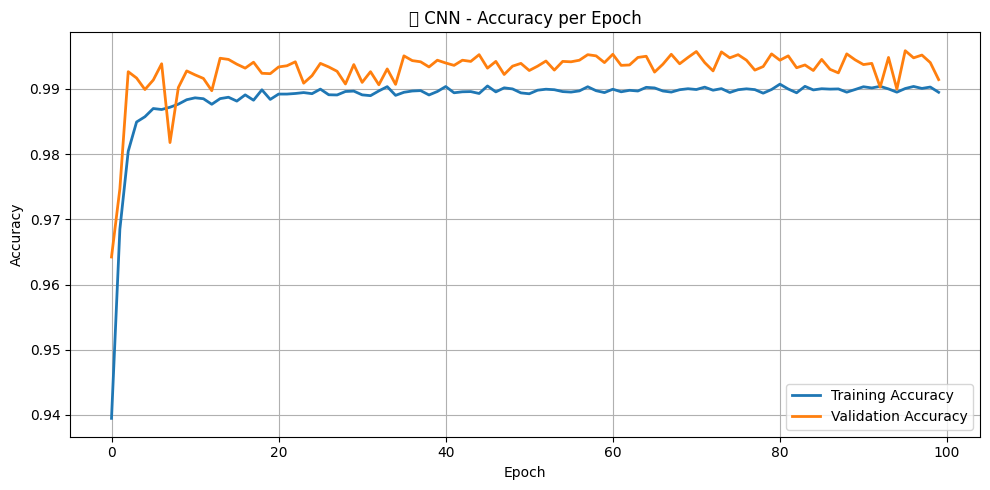

/tmp/ipykernel_13/3028194857.py:159: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


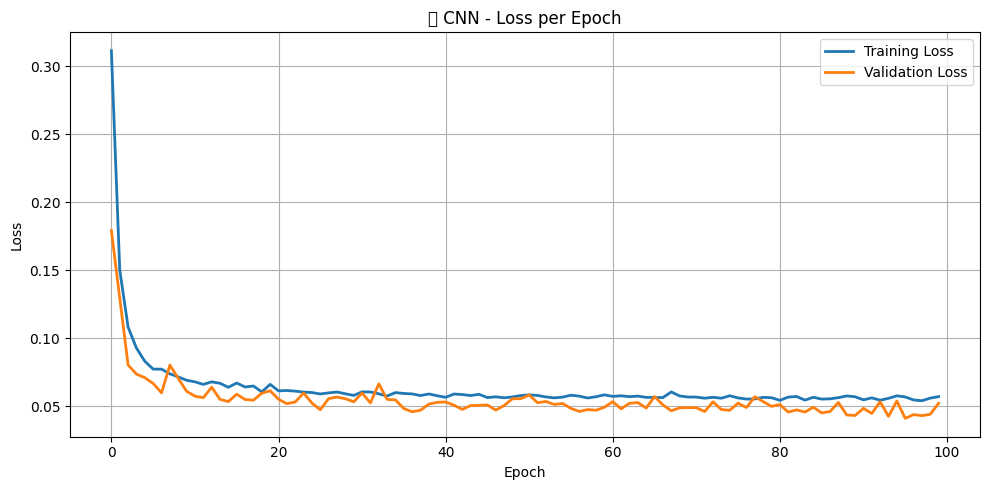

/tmp/ipykernel_13/3028194857.py:176: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


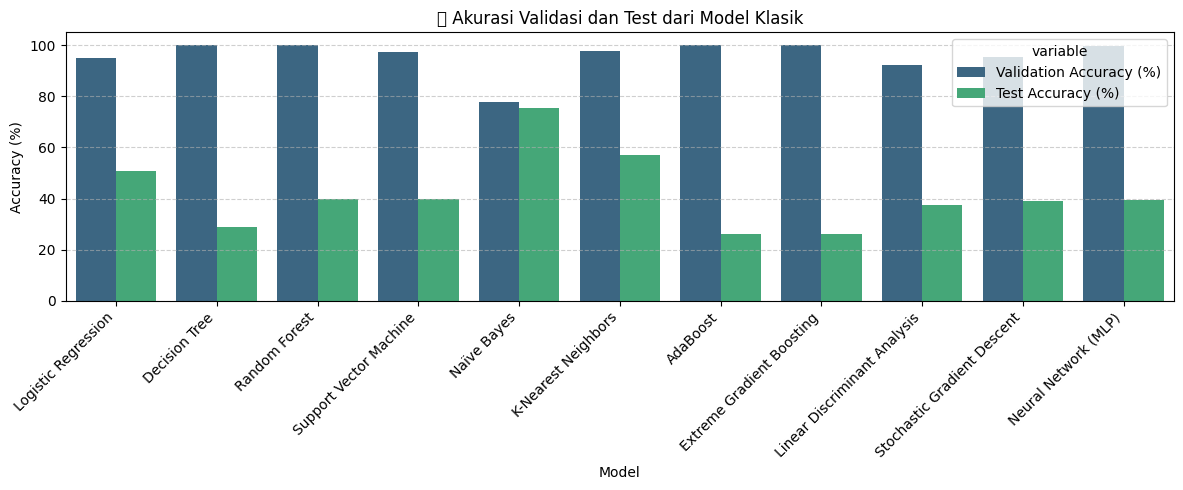

/tmp/ipykernel_13/3028194857.py:187: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


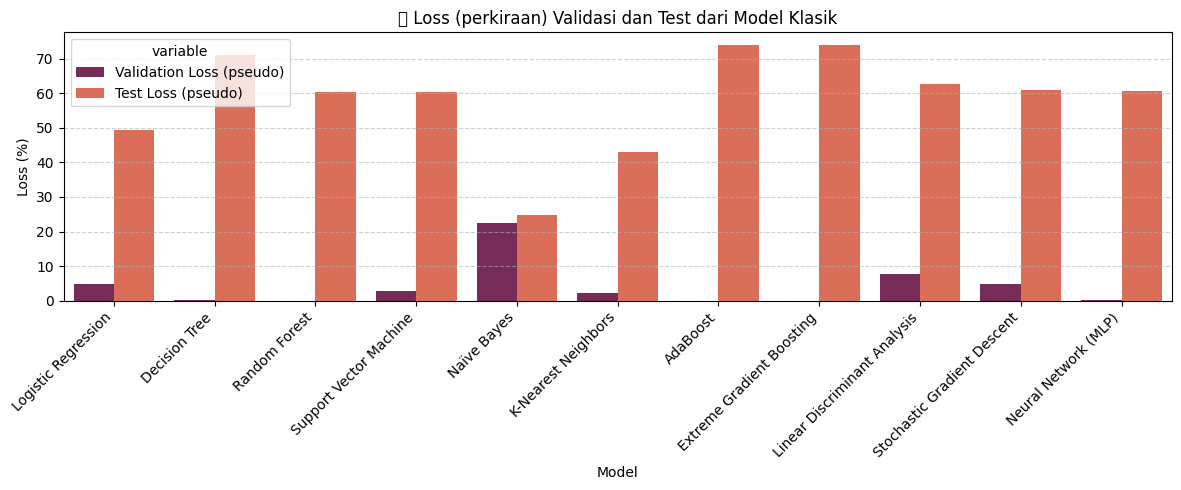

In [15]:
# IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

# LOAD DATA
train_path = "/kaggle/input/tugas-machine-learning-ds-unsw-nb15/UNSW_NB15_training-set.csv"
test_path = "/kaggle/input/tugas-machine-learning-ds-unsw-nb15/UNSW_NB15_testing-set.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# SPLIT FITUR & LABEL
X_train = df_train.drop(columns=["label", "attack_cat"])
y_train = df_train["label"]
X_test = df_test.drop(columns=["label", "attack_cat"])
y_test = df_test["label"]

# ENCODING FITUR KATEGORIK (AMAN DARI UNSEEN)
categorical_columns = X_train.select_dtypes(include=["object"]).columns
encoders = {}

for col in categorical_columns:
    encoder = LabelEncoder()
    X_train[col] = encoder.fit_transform(X_train[col].astype(str))
    label_map = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    X_test[col] = X_test[col].astype(str).map(label_map)
    X_test[col] = X_test[col].fillna(len(label_map)).astype(int)
    encoders[col] = encoder

# NORMALISASI
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SPLIT VALIDASI
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# INISIALISASI MODEL SKLEARN
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(probability=True),
    "Naïve Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extreme Gradient Boosting": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

# EVALUASI MODEL SKLEARN
results = []
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_sub, y_train_sub)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test_scaled)

    val_accuracy = accuracy_score(y_val, y_val_pred) * 100
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100

    results.append({
        "Model": name,
        "Validation Accuracy (%)": val_accuracy,
        "Test Accuracy (%)": test_accuracy
    })

# CNN DENGAN DROPOUT, L2 REGULASI, DAN LEBIH BANYAK LAYER
def create_optimized_cnn(input_shape):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,),
              kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.4),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_optimized_cnn(X_train_sub.shape[1])
history = cnn_model.fit(
    X_train_sub, y_train_sub,
    validation_data=(X_val, y_val),
    epochs=100, batch_size=64, verbose=1
)

# PREDIKSI CNN
y_val_pred_cnn = (cnn_model.predict(X_val) > 0.5).astype(int)
y_test_pred_cnn = (cnn_model.predict(X_test_scaled) > 0.5).astype(int)

val_acc_cnn = accuracy_score(y_val, y_val_pred_cnn) * 100
test_acc_cnn = accuracy_score(y_test, y_test_pred_cnn) * 100

results.append({
    "Model": "CNN (Optimized)",
    "Validation Accuracy (%)": val_acc_cnn,
    "Test Accuracy (%)": test_acc_cnn
})

# HASIL KE DATAFRAME
results_df = pd.DataFrame(results)

# GRAFIK PERBANDINGAN VALIDASI VS TEST AKURASI
plt.figure(figsize=(12, 6))
results_melted = results_df.melt(id_vars=["Model"], var_name="Set", value_name="Accuracy")
sns.barplot(data=results_melted, x="Model", y="Accuracy", hue="Set", palette="mako")
plt.xticks(rotation=45, ha="right")
plt.title("📊 Perbandingan Akurasi Validasi vs Test per Model")
plt.ylabel("Accuracy (%)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# GRAFIK CNN - Accuracy per Epoch
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title("📈 CNN - Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# GRAFIK CNN - Loss per Epoch
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title("📉 CNN - Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === GRAFIK AKURASI & LOSS (DIPERKIRAKAN) MODEL KLASIK ===
# Kita gunakan loss = 1 - akurasi sebagai proxy
classic_models_df = results_df[results_df["Model"] != "CNN (Optimized)"].copy()
classic_models_df["Validation Loss (pseudo)"] = 100 - classic_models_df["Validation Accuracy (%)"]
classic_models_df["Test Loss (pseudo)"] = 100 - classic_models_df["Test Accuracy (%)"]

# GRAFIK BAR: Accuracy dari model klasik
plt.figure(figsize=(12, 5))
sns.barplot(data=classic_models_df.melt(id_vars="Model", value_vars=["Validation Accuracy (%)", "Test Accuracy (%)"]),
            x="Model", y="value", hue="variable", palette="viridis")
plt.title("📊 Akurasi Validasi dan Test dari Model Klasik")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# GRAFIK BAR: Pseudo Loss dari model klasik
plt.figure(figsize=(12, 5))
sns.barplot(data=classic_models_df.melt(id_vars="Model", value_vars=["Validation Loss (pseudo)", "Test Loss (pseudo)"]),
            x="Model", y="value", hue="variable", palette="rocket")
plt.title("📉 Loss (perkiraan) Validasi dan Test dari Model Klasik")
plt.ylabel("Loss (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



📋 Detail Akurasi dan Pseudo-Loss Model Klasik:
Training Logistic Regression...
Logistic Regression - Validation Accuracy: 95.1114%, Loss: 4.8886%
Logistic Regression - Test Accuracy: 50.6368%, Loss: 49.3632%
Training Decision Tree...
Decision Tree - Validation Accuracy: 99.8785%, Loss: 0.1215%
Decision Tree - Test Accuracy: 31.8670%, Loss: 68.1330%
Training Random Forest...
Random Forest - Validation Accuracy: 99.8482%, Loss: 0.1518%
Random Forest - Test Accuracy: 39.6947%, Loss: 60.3053%
Training Support Vector Machine...
Support Vector Machine - Validation Accuracy: 97.2005%, Loss: 2.7995%
Support Vector Machine - Test Accuracy: 39.7648%, Loss: 60.2352%
Training Naïve Bayes...
Naïve Bayes - Validation Accuracy: 77.5733%, Loss: 22.4267%
Naïve Bayes - Test Accuracy: 75.2425%, Loss: 24.7575%
Training K-Nearest Neighbors...
K-Nearest Neighbors - Validation Accuracy: 97.7774%, Loss: 2.2226%
K-Nearest Neighbors - Test Accuracy: 56.9964%, Loss: 43.0036%
Training AdaBoost...
AdaBoost - Vali

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1030/1030 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9016 - loss: 0.4572 - val_accuracy: 0.9658 - val_loss: 0.1808
Epoch 2/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9612 - loss: 0.1691 - val_accuracy: 0.9758 - val_loss: 0.1223
Epoch 3/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9755 - loss: 0.1214 - val_accuracy: 0.9897 - val_loss: 0.0850
Epoch 4/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9833 - loss: 0.0970 - val_accuracy: 0.9909 - val_loss: 0.0767
Epoch 5/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9844 - loss: 0.0870 - val_accuracy: 0.9919 - val_loss: 0.0691
Epoch 6/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9864 - loss: 0.0793 - val_accuracy: 0.9916 - val_loss: 0.0635
Epoch 7/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9866 - loss: 0.0758 - val_accuracy: 0.9943 - val_loss: 0.0614
Epoch 8/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9880 - loss: 0.0716 - val_

/tmp/ipykernel_13/3751806946.py:147: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


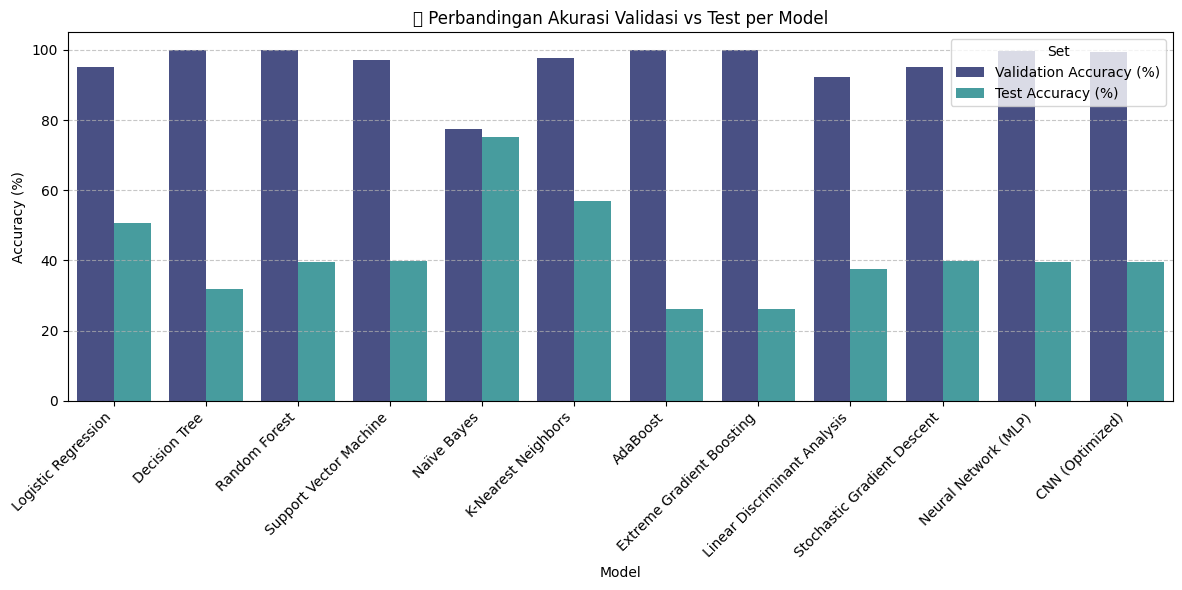

/tmp/ipykernel_13/3751806946.py:159: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


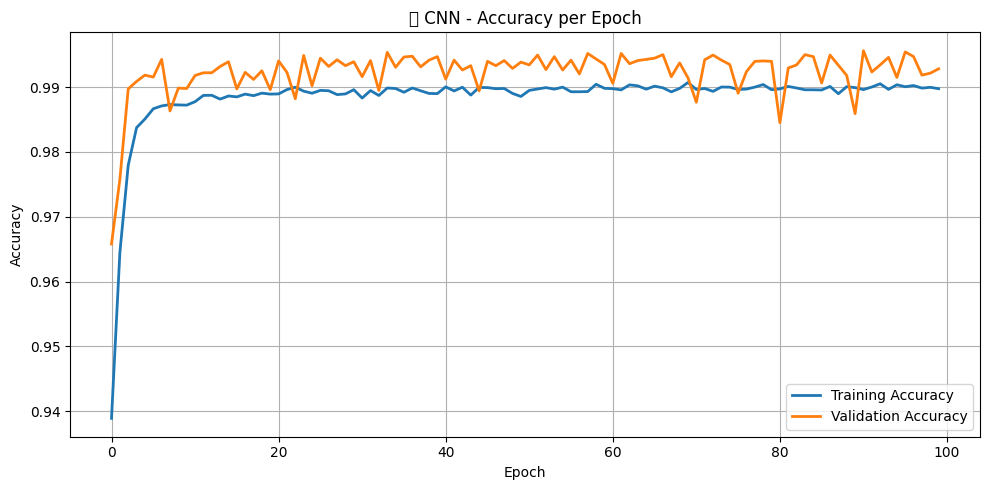

/tmp/ipykernel_13/3751806946.py:171: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


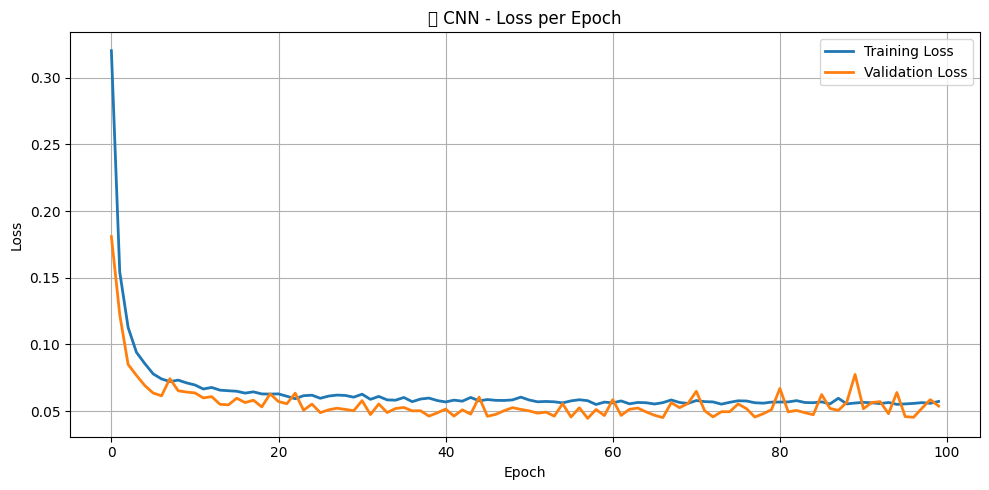

/tmp/ipykernel_13/3751806946.py:188: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


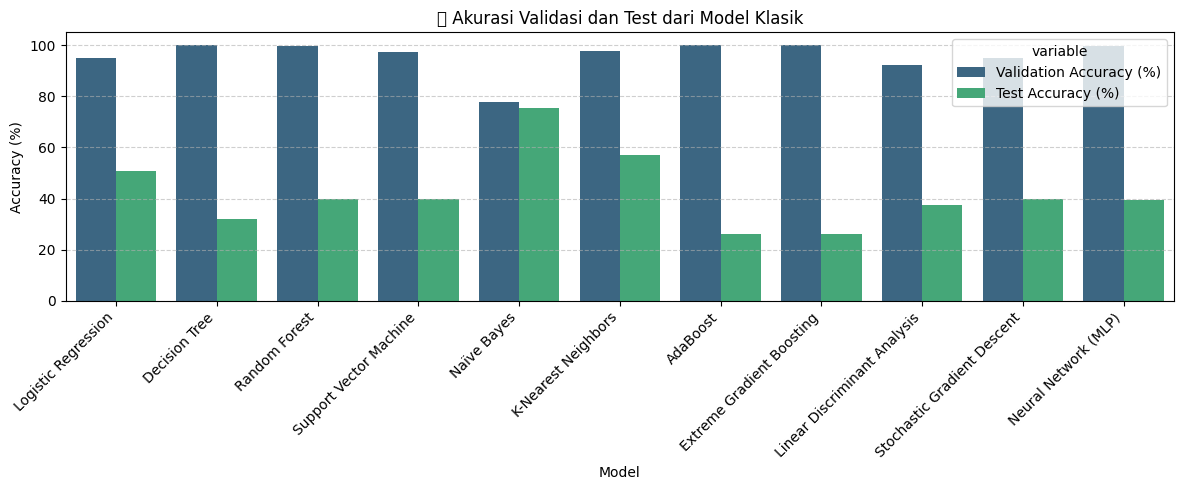

/tmp/ipykernel_13/3751806946.py:199: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


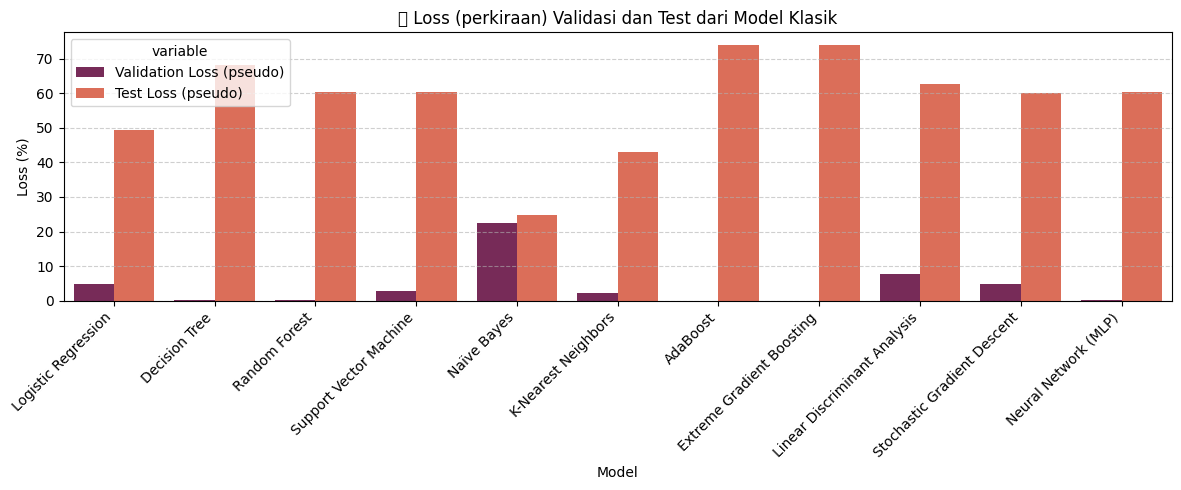

In [16]:
# IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

# LOAD DATA
train_path = "/kaggle/input/tugas-machine-learning-ds-unsw-nb15/UNSW_NB15_training-set.csv"
test_path = "/kaggle/input/tugas-machine-learning-ds-unsw-nb15/UNSW_NB15_testing-set.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# SPLIT FITUR & LABEL
X_train = df_train.drop(columns=["label", "attack_cat"])
y_train = df_train["label"]
X_test = df_test.drop(columns=["label", "attack_cat"])
y_test = df_test["label"]

# ENCODING FITUR KATEGORIK (AMAN DARI UNSEEN)
categorical_columns = X_train.select_dtypes(include=["object"]).columns
encoders = {}

for col in categorical_columns:
    encoder = LabelEncoder()
    X_train[col] = encoder.fit_transform(X_train[col].astype(str))
    label_map = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    X_test[col] = X_test[col].astype(str).map(label_map)
    X_test[col] = X_test[col].fillna(len(label_map)).astype(int)
    encoders[col] = encoder

# NORMALISASI
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SPLIT VALIDASI
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# INISIALISASI MODEL SKLEARN
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(probability=True),
    "Naïve Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extreme Gradient Boosting": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

# EVALUASI MODEL SKLEARN
results = []
print("\n📋 Detail Akurasi dan Pseudo-Loss Model Klasik:")
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_sub, y_train_sub)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test_scaled)

    val_accuracy = accuracy_score(y_val, y_val_pred) * 100
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100
    val_loss = 100 - val_accuracy
    test_loss = 100 - test_accuracy

    print(f"{name} - Validation Accuracy: {val_accuracy:.4f}%, Loss: {val_loss:.4f}%")
    print(f"{name} - Test Accuracy: {test_accuracy:.4f}%, Loss: {test_loss:.4f}%")

    results.append({
        "Model": name,
        "Validation Accuracy (%)": val_accuracy,
        "Test Accuracy (%)": test_accuracy
    })

# CNN DENGAN DROPOUT, L2 REGULASI, DAN LEBIH BANYAK LAYER
def create_optimized_cnn(input_shape):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,),
              kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.4),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_optimized_cnn(X_train_sub.shape[1])
history = cnn_model.fit(
    X_train_sub, y_train_sub,
    validation_data=(X_val, y_val),
    epochs=100, batch_size=64, verbose=1
)

# PREDIKSI CNN
y_val_pred_cnn = (cnn_model.predict(X_val) > 0.5).astype(int)
y_test_pred_cnn = (cnn_model.predict(X_test_scaled) > 0.5).astype(int)

val_acc_cnn = accuracy_score(y_val, y_val_pred_cnn) * 100
test_acc_cnn = accuracy_score(y_test, y_test_pred_cnn) * 100
val_loss_cnn = 100 - val_acc_cnn
test_loss_cnn = 100 - test_acc_cnn

results.append({
    "Model": "CNN (Optimized)",
    "Validation Accuracy (%)": val_acc_cnn,
    "Test Accuracy (%)": test_acc_cnn
})

print("\n📋 Detail Akurasi dan Loss CNN:")
print(f"CNN - Validation Accuracy: {val_acc_cnn:.4f}%, Loss: {val_loss_cnn:.4f}%")
print(f"CNN - Test Accuracy: {test_acc_cnn:.4f}%, Loss: {test_loss_cnn:.4f}%")

# HASIL KE DATAFRAME
results_df = pd.DataFrame(results)

# GRAFIK PERBANDINGAN VALIDASI VS TEST AKURASI
plt.figure(figsize=(12, 6))
results_melted = results_df.melt(id_vars=["Model"], var_name="Set", value_name="Accuracy")
sns.barplot(data=results_melted, x="Model", y="Accuracy", hue="Set", palette="mako")
plt.xticks(rotation=45, ha="right")
plt.title("📊 Perbandingan Akurasi Validasi vs Test per Model")
plt.ylabel("Accuracy (%)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# GRAFIK CNN - Accuracy per Epoch
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title("📈 CNN - Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# GRAFIK CNN - Loss per Epoch
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title("📉 CNN - Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === GRAFIK AKURASI & LOSS (DIPERKIRAKAN) MODEL KLASIK ===
# Kita gunakan loss = 1 - akurasi sebagai proxy
classic_models_df = results_df[results_df["Model"] != "CNN (Optimized)"].copy()
classic_models_df["Validation Loss (pseudo)"] = 100 - classic_models_df["Validation Accuracy (%)"]
classic_models_df["Test Loss (pseudo)"] = 100 - classic_models_df["Test Accuracy (%)"]

# GRAFIK BAR: Accuracy dari model klasik
plt.figure(figsize=(12, 5))
sns.barplot(data=classic_models_df.melt(id_vars="Model", value_vars=["Validation Accuracy (%)", "Test Accuracy (%)"]),
            x="Model", y="value", hue="variable", palette="viridis")
plt.title("📊 Akurasi Validasi dan Test dari Model Klasik")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# GRAFIK BAR: Pseudo Loss dari model klasik
plt.figure(figsize=(12, 5))
sns.barplot(data=classic_models_df.melt(id_vars="Model", value_vars=["Validation Loss (pseudo)", "Test Loss (pseudo)"]),
            x="Model", y="value", hue="variable", palette="rocket")
plt.title("📉 Loss (perkiraan) Validasi dan Test dari Model Klasik")
plt.ylabel("Loss (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
